### Creating a recommendation system based on total_rating_count

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv("ml-latest-small/movies.csv")
df2 = pd.read_csv("ml-latest-small/ratings.csv")

In [3]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df1.drop(columns = ["genres"],inplace = True)

In [5]:
df1.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
df2.drop(columns = ["timestamp"],inplace = True)

In [8]:
df2.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [9]:
df = df1.merge(df2,on = "movieId")

In [10]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [11]:
df.shape

(100836, 4)

In [12]:
# removing all NA points from rows
df = df.dropna(axis = 0,subset = ["title"])


In [13]:
#creating a dataframe by grouping title with rating
total_rating_count = df.groupby("title")["rating"].count().reset_index().rename(columns = {"rating":"total_rating_count"})

In [14]:
total_rating_count.head()

,title,total_rating_count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [15]:
df = df.merge(total_rating_count,on = "title")

In [16]:
df.head()

,movieId,title,userId,rating,total_rating_count
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215


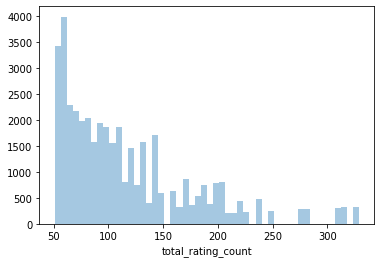

In [24]:
import seaborn as sns

sns.distplot((df["total_rating_count"]),kde = False)

In [18]:
# neglecting all the movies having total rating counr less than 50
threshold = 50
df = df.query("total_rating_count > @threshold")

In [19]:
matrix  = df.pivot_table(index = "title",columns = "userId",values = "total_rating_count").fillna(0)

In [20]:
matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,54.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,109.0,0.0,0.0,0.0,...,0.0,0.0,109.0,0.0,0.0,109.0,0.0,109.0,0.0,109.0
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,58.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,...,0.0,0.0,0.0,0.0,80.0,0.0,0.0,80.0,0.0,80.0
"40-Year-Old Virgin, The (2005)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0
A.I. Artificial Intelligence (2001),0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,56.0,56.0,0.0,56.0,0.0,56.0
"Abyss, The (1989)",62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,62.0,0.0,0.0,0.0,0.0,62.0,0.0,62.0
Ace Ventura: Pet Detective (1994),0.0,0.0,0.0,0.0,161.0,161.0,0.0,0.0,0.0,0.0,...,0.0,161.0,0.0,161.0,0.0,0.0,0.0,161.0,0.0,161.0


In [21]:
from scipy.sparse import csr_matrix

mat = csr_matrix(matrix.values)
#mat

from sklearn.neighbors import NearestNeighbors
model  = NearestNeighbors(metric = "cosine",algorithm = "brute")
model.fit(mat)

NearestNeighbors(algorithm='brute', metric='cosine')

In [22]:
recommendation_for = np.random.choice(matrix.shape[0])
print(recommendation_for)

distances,indices = model.kneighbors(matrix.iloc[recommendation_for,:].values.reshape(1,-1),n_neighbors = 6)
print(distances)
print(indices)

134
[[0.         0.38146176 0.3838137  0.39091885 0.39211713 0.40795135]]
[[134 212  39 386 378 264]]


In [23]:
for i in range(0,len(distances.flatten())):
    if i ==0:
        print("Recommendation for {0}:".format(matrix.index[recommendation_for]))
        
    else:
        print("{0}: {1} with distance of :{2}".format(i,matrix.index[indices.flatten()[i]],distances.flatten()[i]))
        

Recommendation for E.T. the Extra-Terrestrial (1982):
1: Indiana Jones and the Temple of Doom (1984) with distance of :0.3814617580376425
2: Back to the Future (1985) with distance of :0.38381370294405914
3: Terminator, The (1984) with distance of :0.3909188458555989
4: Star Wars: Episode VI - Return of the Jedi (1983) with distance of :0.3921171337145194
5: Men in Black (a.k.a. MIB) (1997) with distance of :0.407951345294998
